In [24]:
import pandas as pd
texts = pd.read_json("data/window_explorations.json", orient='records')
display(texts.shape)
texts.head()
#texts["text"] = texts["full_text"]

(333, 1)

,text
0,On the right i can see a lake with boats. Behi...
1,"It's a still and sleepy new year's Day, with j..."
2,"a steep rocky crevice, each hold so familiar t..."
3,"Die Nacht ist bereits hereingebrochen, die Ste..."
4,I'm at the end of gravel covered breakwater wi...


In [25]:
from nltk.tokenize import word_tokenize
from collections import Counter
import re

texts_as_words = []
texts_excesses = []
original_texts = []
vocabulary = Counter()
for (_, row) in texts.iterrows():
    text = row.text
    words = word_tokenize(text)
    excess_text = {}
    text_as_words = []
    original_text = []
    length = len(words)
    for (i, word) in enumerate(words):
        original_text.append({ "word": word, "value": 1.0 })
        word = word.lower()
        if re.search("[a-zA-Z0-9]", word):
            text_as_words.append({"word": word, "value": 1.0}) # 1/float(length)
            vocabulary.update([word])
        else:
            excess_text[i-1] = word
    texts_as_words.append(text_as_words)
    texts_excesses.append(excess_text)
    original_texts.append(original_text)
    
    
import json

with open("data/trees_with_weights.json", "w") as file:
    json.dump(texts_as_words, file)
    
original_texts

[[{'word': 'On', 'value': 1.0},
  {'word': 'the', 'value': 1.0},
  {'word': 'right', 'value': 1.0},
  {'word': 'i', 'value': 1.0},
  {'word': 'can', 'value': 1.0},
  {'word': 'see', 'value': 1.0},
  {'word': 'a', 'value': 1.0},
  {'word': 'lake', 'value': 1.0},
  {'word': 'with', 'value': 1.0},
  {'word': 'boats', 'value': 1.0},
  {'word': '.', 'value': 1.0},
  {'word': 'Behind', 'value': 1.0},
  {'word': 'it', 'value': 1.0},
  {'word': 'there', 'value': 1.0},
  {'word': 'are', 'value': 1.0},
  {'word': 'mountains', 'value': 1.0},
  {'word': 'with', 'value': 1.0},
  {'word': 'forest', 'value': 1.0},
  {'word': 'on', 'value': 1.0},
  {'word': 'top', 'value': 1.0},
  {'word': '.', 'value': 1.0},
  {'word': 'On', 'value': 1.0},
  {'word': 'the', 'value': 1.0},
  {'word': 'left', 'value': 1.0},
  {'word': 'there', 'value': 1.0},
  {'word': 'is', 'value': 1.0},
  {'word': 'a', 'value': 1.0},
  {'word': 'Rockwall', 'value': 1.0},
  {'word': '.', 'value': 1.0}],
 [{'word': 'It', 'value': 1.0}

In [26]:
from collections import defaultdict

texts_as_grouped_words = []

for text in texts_as_words:
    grouped_words = defaultdict(lambda: 0)
    for data in text:
        grouped_words[data["word"]] = 1.0
    texts_as_grouped_words.append(dict(grouped_words))

In [27]:
def compute_average_text(texts, excluded_words=[]):
    average_text = defaultdict(lambda : 0)
    n_texts = len(texts)
    for text in texts:
        for word in text:
            if word not in excluded_words:
                average_text[word] += text[word] / float(n_texts)
    return average_text
            
average_text = compute_average_text(texts_as_grouped_words)
[[word["word"] for word in doc] for doc in texts_as_words]

[['on',
  'the',
  'right',
  'i',
  'can',
  'see',
  'a',
  'lake',
  'with',
  'boats',
  'behind',
  'it',
  'there',
  'are',
  'mountains',
  'with',
  'forest',
  'on',
  'top',
  'on',
  'the',
  'left',
  'there',
  'is',
  'a',
  'rockwall'],
 ['it',
  "'s",
  'a',
  'still',
  'and',
  'sleepy',
  'new',
  'year',
  "'s",
  'day',
  'with',
  'just',
  'a',
  'breath',
  'of',
  'wind',
  'and',
  'the',
  'occasional',
  'pedestrian',
  'and',
  'car'],
 ['a',
  'steep',
  'rocky',
  'crevice',
  'each',
  'hold',
  'so',
  'familiar',
  'to',
  'my',
  'hands',
  'and',
  'hard',
  'leather',
  'boots',
  'the',
  'gorse',
  'rocks',
  'and',
  'heather',
  'pass',
  'efficiently',
  'beneath',
  'my',
  'feet',
  'no',
  'rest',
  'till',
  'the',
  'top',
  'is',
  'reached',
  'my',
  'heart',
  'beats',
  'hard',
  'as',
  'the',
  'wind',
  'tips',
  'me',
  'sideways'],
 ['die',
  'nacht',
  'ist',
  'bereits',
  'hereingebrochen',
  'die',
  'sterne',
  'sind',
  'k

In [28]:
[[word["word"] for word in doc] for doc in texts_as_words]

[['on',
  'the',
  'right',
  'i',
  'can',
  'see',
  'a',
  'lake',
  'with',
  'boats',
  'behind',
  'it',
  'there',
  'are',
  'mountains',
  'with',
  'forest',
  'on',
  'top',
  'on',
  'the',
  'left',
  'there',
  'is',
  'a',
  'rockwall'],
 ['it',
  "'s",
  'a',
  'still',
  'and',
  'sleepy',
  'new',
  'year',
  "'s",
  'day',
  'with',
  'just',
  'a',
  'breath',
  'of',
  'wind',
  'and',
  'the',
  'occasional',
  'pedestrian',
  'and',
  'car'],
 ['a',
  'steep',
  'rocky',
  'crevice',
  'each',
  'hold',
  'so',
  'familiar',
  'to',
  'my',
  'hands',
  'and',
  'hard',
  'leather',
  'boots',
  'the',
  'gorse',
  'rocks',
  'and',
  'heather',
  'pass',
  'efficiently',
  'beneath',
  'my',
  'feet',
  'no',
  'rest',
  'till',
  'the',
  'top',
  'is',
  'reached',
  'my',
  'heart',
  'beats',
  'hard',
  'as',
  'the',
  'wind',
  'tips',
  'me',
  'sideways'],
 ['die',
  'nacht',
  'ist',
  'bereits',
  'hereingebrochen',
  'die',
  'sterne',
  'sind',
  'k

In [29]:
import numpy as np

def compute_distances(from_text, to_collection):
    distances = []
    for text in to_collection:
        distance = 0
        for word in text:
            distance += text[word] * from_text[word]
        distances.append(distance / (np.linalg.norm(list(from_text.values())) * np.linalg.norm(list(text.values()))))
    return distances

distances_to_average = compute_distances(average_text, texts_as_grouped_words)

In [30]:
def reconstruct(text, excesses, averages):
    reconstructed = ""
    for (ix, data) in enumerate(text):
        reweighted_average = average_text[data["word"]] * float(len(text))
        weighted_value  = data["value"] - reweighted_average
        if (weighted_value > 0):
            reconstructed += data["word"].strip()
        else:
            reconstructed += "_" * len(data["word"])
        if ix in excesses:
            reconstructed += excesses[ix]
        reconstructed += " "
    return reconstructed.strip()
reconstruct(texts_as_words[120], texts_excesses[120], average_text)

'___ bridge twinkles ___ ___ stars sway'

In [31]:
with open("data/trees_unique_words_with_global_weights.json", "w") as file: 
    json.dump([[{"word": k, "value": average_text[k] } for k in text ] for text in texts_as_grouped_words], file) 

0.8528528528528565


(array([3.591e+03, 4.900e+01, 8.000e+00, 4.000e+00, 5.000e+00, 3.000e+00,
        1.000e+00, 2.000e+00, 1.000e+00, 2.000e+00]),
 array([0.003003  , 0.08798799, 0.17297297, 0.25795796, 0.34294294,
        0.42792793, 0.51291291, 0.5978979 , 0.68288288, 0.76786787,
        0.85285285]),
 <BarContainer object of 10 artists>)

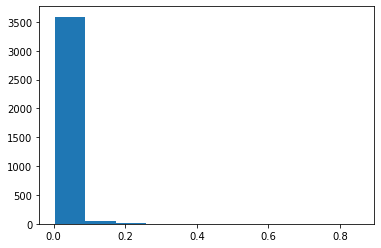

In [32]:
import matplotlib.pyplot as plt
print(max(average_text.values()))
plt.hist(average_text.values())

In [33]:
import numpy as np
#from escpos.printer import Usb
#from time import sleep

#printer = Usb(0x0416, 0x5011)
#printer.text("¿Hola como estas?\n")

def prepare_for_print(string):
    return '\n'.join(string[i:i+35] for i in range(0, len(string), 35)) + '\n\n'

excluded_words = []

output_steps = [0, 75, 170, 280, 331]
step = 0
while len(texts_as_grouped_words) > 0:
    average = compute_average_text(texts_as_grouped_words, excluded_words)
    distances = compute_distances(average, texts_as_grouped_words)
    most_similar_ix = np.argmax(distances)
    most_similar_words = texts_as_words.pop(most_similar_ix)
    most_similar_excesses = texts_excesses.pop(most_similar_ix)
    grouped_words = texts_as_grouped_words.pop(most_similar_ix)
    original_texts.pop(most_similar_ix)
    for word in grouped_words:
        excluded_words.append(word)
    #printer.text(prepare_for_print(reconstruct(most_similar_words, most_similar_excesses, average)))
    print(prepare_for_print(reconstruct(most_similar_words, most_similar_excesses, average)))
    if step in output_steps:
        with open("data/trees_vocabulary_with_weights_at_step_%s.json" % step, "w") as file:
            json.dump([{"word": k, "value": average_text[k] } for k in average_text], file)
        with open("data/documents_at_step_%s.json" % step, "w") as file:
            json.dump([[word["word"] for word in doc] for doc in texts_as_words], file)
        #with open("data/trees_unique_words_with_global_weights_step_%s.json" % step, "w") as file: 
            #json.dump([[{"word": k, "value": average_text[k] } for k in text ] for text in texts_as_grouped_words], file)
        #with open("data/trees_original_texts_step_%s.json" % step, "w") as file:
            #json.dump(original_texts, file)
    step += 1
    
#printer.close()

__ _____ __ __ _ ___ ___ _ fence. t
hen comes _ field ____ _____ ___ __
____ __ _ lake __. ___ ____ _____ _
_ _ farm


_______ __ ______ _ ___ ____ __ __ 
______ ______. _ ___ _ _________ __
_ ________ _____ _____ ____( __ ___
 ___ ____ ______ __ ___ ___________
_ ___ ____________ ____ _______ ___
__ __) _. ___ _____ ___, ___ _____ 
____ ____ _________ ______ __ _____
 __ ___ ____ _ ___. ____ ______ ___
__ ____, _______ __ ___ ______ ____
 ___ _______ __( ____ ____ ___ ____
_______ _______ ____ _ ___ ______ _
_____ ___ _____) _________. _____ _
___ ____ ______ __ _____, ____ ____
__ ___ _____. ____ _____ ______ ___
__ ___ _____ _____ ____. __ __ ____
___ _________ ___ ___ _____ _______
__, ____ _______ ____ ______ _____.
 _____ __ ______ __ ___ ____ ______
___ _________ _ _________ ____ ___ 
________ _____. _____ ___ _________
_ ________ ___ _________ ______ ___
 ________ ____. ___ ___ _____ ____(
 ____ __ ___ _____ ____, ___ ______
 __ _____, ____ ___ _____ _, ______
 __ ___ _____, __

_ __ _______ __ __ living ____, __ 
__ desk __, ___ sliding _____ doors
 leading __ ___ backyard __ __. _ _
________ _____ ___ ____ ____ _____,
 _____ __ _ _____. ______ ______ __
_ _____ __ ___ backyard rustle gent
ly _ crow __ cawing ______. ___ _ h
ummingbird __ using ___, ______ ___
_ ___ ______


__ ___ ___ kühler mittwochmorgen, _
__ ___ ___ _____ ____ __ ___ koller
wiese saß ___ geschlossenen _____ _
__. nehme _____ geruch ___ frischem
 _____ wahr dass ____, ___ bisschen
 nass ___ ___ höre ___. ____ _____ 
__________ ___ ___ genieße ___ ____
__ __________ nebenbei höre ___ ___
_. unzählige ___ _____ ___ bußen __
_ nehme _____ ____ wahr. oder ____ 
___ ____ ___ lüftchen __ ___ _____ 
kalt ____ ____. _____ ____ __ ___ _
__, wenig kühl __ ___ _____ ____ ru
hig ____ trotzdem ____. entspannend
 ___ _____ laut ___ kann, ____ ____
 gut konzentrieren ___ öffne meine 
_____ ___ ____ rechts ___ ___ ___. 
______ ___ vermute ___ ___ ________
 _ ___ _ jahren alt ____, ___ _____
_ spielen ___

__ ______ ____ ___ __________. ____
 _______ __ ____ __ ______ ___ ___ 
___ ______ __ ___ ____ _, _____ ___
 ______ _______ ___ ____, ______ __
___ ______ ___ apples ___. flowerin
g ______ ___ _______ strolling. ___
_ __ _ hurry, ___ __, stopping bind
ing ___ shoe __. ___ ___ stones/roc
ks ______ __ protect ___ _____ cent
ral _____ ____ ____ _______ ____ __
 ___ _______ corridor ____ _ ______
_ _____( ___ ____ ___ patrolling __
_____) ___. _ free _______ ____ ___
 easy. __ ____ hour commuting _____
 ___ _______ speedy __ ___( ____ __
____ _ ___ ____ _______! _____) ___
. ____ ____ _____ _ ____ ___ __ ___
____ __ _. ___ ___ ____ __ __ _, __
__ __ _____ __ __. ___ electric ___
_


rainy gloomy ______ __ strasbourg _
_ ___ __ sad, _______ _____ ___ ___
_ 12:00 till 14:00 ___ ___ ______ s
top _______ ___ _ delicious lunch _
. ____ lock __ bike ______ ___ rest
aurant ___ came inside __ ___ ____ 
___ welcoming atmosphere meal __. _
__ ___ beef tartar ____... _ glass 
__ ___ wine


fairfield 

____ _____ ___ _ ____ __ describe _
____ __ miles ___ miles __ motorway
 ___ ____. ___ ___ _ ____ _____ sor
t __ _ van __. kept ______ __ _____
 ____. __ __ rear, offside tyre ___
 flatter ___ flatter ___ ____ _____
____ _____. ___ __ array __ ____ __
______ _____ __ ___ 'old ____ ____ 
belched ______ ____ ___' _____ stat
ion __ pouting cooling towers __ __
__ passed __ __ origami. mclaren __
_ drifted __ __ older gentleman __,
 ___ panamera stately __ ___ ____ _
 well-oiled moustache ___. miles __
 ____ _____, steady ______ __ settl
e __. _ particular wiper rate probl
ems, problems miles __ ____ ___ ___
_ ___ array __ ________ miles. ___ 
miles, __ ____.


____ __ _ coastal, fantastic locati
on __ rare beauty ___ _____ _____ _
__. approach __ ___ _____ brings se
nse __ adventure __ ___, ___ __ __ 
_______ dense __________ cross dirt
 _____, ___ jump ____ _ _____ ____ 
___ bay ___. ___ observe ___ ___ is
lands ____ ___ _______ _ short ____
____ ____ ___ coast _____ _____ sun
set ___ li

_ ___ ___ ___ _________ __ kintail,
 ____ _______ summits __. _ dawn’ _
__ _ ___ ___ ___ parallel lines __ 
birch _____ __ ___ headlights bette
r stop writing. __ watch ___ deer


lochend loch __ coatbridge. mcds br
eakfast _____ watching ___ _____ fo
ul ___. loch __ __ ___ quarry __ __
__ workings _____ ___ flooded __ _.
 ___ ____’ ____ _ saw ______ standi
ng, __ ___ ______ _ ___ months ___ 
__ ___ ______ _ swan. ___ 6 eggs __
__ ___ ____ five hatched ____ ____ 
_ _____. ____ ___ ____. cygnets ___
__ __ _ fake whale tail __ ___. ___
__ _ checked __ _______ photo _____
 shows ____ ___. _____ ___ _____ 10
cm higher __ ___ tail __ december


____ _____ wreaks __ hard ____ ___ 
capitulated social virility. ___ so
unds ___ sights ___ _____ ____ dust
 ___ steel _____. __ __ exhausted f
eeling __ ___ _________ pressed ___
_, ____ ___ weight __ ____ 150 ____
_ __ digging ________ _______ freig
ht, ___ polluting, _____ _____ __, 
__ eery silence. __ __, given ___ c
entral _____ context ___ ___

das gebiet zeigt sich als hügelland
schaft. ___ region ist ländlich gep
rägt es, gibt aber ach dicht besied
elte zonen das gebiet. erstreckt si
ch über ein tal welches umgeben ist
, von waldflächen mischwald ___ umg
ebung befindet( sich auf) einer. hö
he von 500-700 meter


_____, _ _____ ___ _____ striped ta
bby cat passes __ he. __ monochrome
 _ __. wearing _ ___ ______ moss-gr
een jumper ___ ___ ______ ___ ___ _
 suspect, ___ cat ___ caught ___ ze
itgeist better ____ _ __ ___ sombre
 greys, he ___ _____ draw ____. _ p
encil __ _____ charcoal _ _____ nee
d __ least ___. carefully chosen-co
loured pencil _____ _ cat passes __
 __ __. he __, __ __ ___ tv he, pas
ses __ __ __ _ __ __ ___ radio.


___ ______ __ ______. ___ ____ colo
r ____, ____ _____ __ ___ _____ ___
 ____ ______ _______ __. __ _____ _
___ flocks __ _____ visit ___ _____
_ regularly _____ martin ____. tit 
blackbird _____, tit ___ ___, favor
ites ___, wren ___ robin often ___ 
together searching ___ food funny. 
__ ___ 

_____ ___ ____ __ _____. ____ ____ 
___ ______ ____, ____ _____ ______ 
____ _____. thin __ _ stick ____ __
_ ___, __ wrap your arms ______ bir
dhouses lined beautifully __. ___ d
eck ___ _____ ____ ___ ____. __ ___
__ ___. ___ ____ ____ ___ ___ _____
_. unique songs ____ _____ ___ voic
es. ______ _____ ones ___ _____ one
s _____ ____ ______. tummies ___ __
___ ____, _____ tummies ___ _, cool
 ______ whistling _______ __, hair


_ ___ _ calm navy channel ______ __
 north penders, framed __ douglas f
irs _. couple __ bull kelp ___ floa
ting __ ___ ______ bay


_ ___ ___ hochshulstrasse 50, stude
nten wohnheim infront __ __ _. ___ 
___ fritz loffner strasse


sehr kühles wetter hier ___ sehe au
s dem fenster den nachtbar seine ba
umen, das kleine naturschutzgebiet 
__ der nähe und __ horizont die aus
läufer der magaliesberge


__’ _ breezy gusts. __ ____ 3-4 ___
 _____ ____ chilly _ ___! ___ _____
 horses __ ___ ____ waters __ ___ m
inch _ flock __. gulls float _____ 
___ cliffs _ ____ c

__ __ _______ _____! ____ __ ___ __
 britany _____ ___ _... __ __ _ ___
_ ____ __ ___ ____ __ ___( covid re
fugees ____ ___ __ ___ _ __) amazed
, __ ___ _______ blooming __ januar
y _ wish _ knew ___. name __ ___ __
_ ______ bush ___ tried __ ____ __ 
__, _______ ___ ____ __ success _ _
__ ___ lavender __ ____ ___. bamboo
 ___ _____ ______ __________ _____ 
__, ____ ____ __, ___ gulf __ ___. 
morbihan ____ kiwis _ learned _____
___


__ __ _______ _____ __ edinburgh. _
__ ____ __ ___ ___ _______ __ _____
_ __. 've ___ _ scarecrow ___ __ __
_ local primary ______ ___ running 
_ scarecrow festiival __ raise ____
 money _____ ___. _____ 70 scarecro
ws __ ___ ______ catchment _____ 8 
__, ___ ____ alone


___ rooks ___ ____ ____ _______, __
____ sorties ___. _____ locked __ _
__ tail feathers __ ___ _____ maver
ick ___, goose __ _____ __. __ _ sl
ow monday ___ refuse _____ sits, __
 ___ ______ card ___ paper blue-lid
ded bins, __ recyclables either ___
_, __ _ __ _____ ___. likely ___ _ 
m

_ ___ _ pretty regular english ____
__ ____ _ strip __ _____ ___ _____.
 ___ _____ hide _____ _________ ___
_. ______ __ visited regularly __ _
 wide variety __ animals including 
foxes, _________ cats ___, __ aston
ishing, number __, ______ _____ amo
ng ______ ___ list includes _____. 
parakeets ____ tits, ___ woodpecker
s


____ ___ flat __ 18th floor facing 
___ rocky _________, _ __ enjoying 
___ shiny ________ picks _____. sev
eral ____ __ ____ ___ ___ ___ ___ _
____ shape, ___ icy slopes ___ nice
ly recognisable


__________ __ sunshine pouring __. 
shadows ___ bouncing ___ ___ _____ 
___ ___ ____ __ ______ ___ ______ _
__. _____ ___ barren ___ _____ __ _
___ ____ ____ ____ clumped ______ _
_ ___ shady areas ___ _____. __ pat
chy ____ ____ dried, areas ___ ____
 ____ _____ areas


__ __ _____ ___ ____ _____ ____ _ _
___ __ 41 degrees. ___ ____ ___ mel
ted somewhat ____ ___ ______ leavin
g ugly _____, _____ ___ _____. ____
 dropped _____ ____ __ ____ __ ___ 
____, ___ ____ _____ s

_________ _____! _ ____ __ ___ ____
_ ____ _____ ____ __ eyes shut __ h
alf tide ___ listen __ ___ waves __
_ _____ _____. __ surreal _____ tim
es. __ ____ ____ ____ _ ball __ fri
sbie __ ___ ___ ____ ______ sandy _
____ __ __ _____. ____ ___ ___ stee
p ___, ____ ____ ____ _____ __ ___ 
____ ___ ____ _____ _____ ___ ____ 
__ explore ____ ___ ____


___ ___, ____ ______ rise stepwise 
__ ___ ____ _______ _____ lit __ si
deways sunshine ___, ______ ____ in
stead __ ___ ________ skyline ___ m
ounds __ ______ __ layered greys


_ ___ generic _________ _________ _
___ ____ ____ similar __ ____ _____
 ___ ____ ________ driveways. ____ 
___ one-story _________ __________ 
__ _____ ____ ____ ____ planted dec
oratively ___. ______ ____ ____ gri
lls ___ ______ _______ _____ were, 
___ _____ __ ___ ______ ___ ____ __
___ _____ ___ ____. ______ __ ___ d
riveways ___ __ ___ _______


____ _____ __ fill ____ _____ ___ _
______. _______ __ ____ ____ __ woo
d _____ __ _ wild boar __ ___ shoul
d carefu

__ __ ____ ___, ___ _ ___ ___ ____ 
__ ___ _____ ___ roofs __ _________
 __ ___ lamplight sadly. __ __ ____
 cleared ____ ___ ______ ___ footpa
ths


_____, gardens ____, nearby __ ___.
 horizon mountains ___ ___: wallace
 monument


_ ___ _ _____ ___ ______ ____ __ __
. _ ____ ___ _ ___ _____ ________ _
_______ _____ ____. __ ___ ________
 _____ __, _ ______ _____ ____ hori
zontal slats _ ___ ___. ___ pool __
__ __ surrounds _______ ___ gaps __
 ___ slats _ ___ _ ____. ___ ____ _
___ wispy _____ ______ _____ __ mul
ch __ ___. ______ __ _____ __ ___ _
____ ___ ____ ______


___ moon __ ____ ___ ____ ______ to
night. __ hangs _____ ___ monochrom
e silhouettes __ __ neighbour __ __
_ storey _____ ___ ___ fejoia _____
 __ ___ ____ __ __ ______


pleanty __ gardens ____ _____ ___ b
ushes __ _ family friendly area


___ _________ __ flying __ __ __ zo
om _______ argau. ___ moment ___ __
_ ___ snowy ________ tops another, 
deep ______ ___ ___. __ ____ ___ __
_ ____ __ pattering __ ___ ______

_ __ _______ _______ ___ chalet. _ 
___ ___ ___ forests ______ __ ___ _
__ ________ ____ __ ___ ______ ____
, __ _____ ___ _______ __ ____ ___ 
______ ___ _______ __ ___ unusually
 ____ ___ ___ _______ _____ __. __ 
___ valais hut grange __ ___( meado
w __) _____ __ ___ chalet ___ meado
w __ ______ _____. __ ___ _______ _
___ awake once ___ ___ comes ___ _ 
____ ___ _____ ___ ____. ____ __ __
_ ________ _____ __ _ ____ ______ _
_ _____. ________ ___ ___ _______ _
_ ___ ______ ___ ___ __ ____


sunny ___ smiling embrace __ ___ se
a


___ __ shining __ ___ ________ tops
 ___ ___ vineyards ___ ____ __ ____
__ ___ orange _______. __ __ _ ____
_____ ___ ____ ____ _____ _____. __
 _ farm ______ __________ __ _____ 
____ golden ______ ______ _______. 
____ ___ scenery particularly _____
____


__ __ _ ____ ___ _____ ___ _____. _
_ _____ __ __ ___ ____ _____ ____ _
__ _____ __ _____ __ __ ______ ____
__. ____ _____ __ _ ____ __ ____ __
___ ____ _ great ____ __ ___ san ga
briel _________ __ ___

beautiful




/var/folders/6p/bz9fkqg972n80bsnrgvczj140000gn/T/ipykernel_78412/2250797466.py:9: RuntimeWarning: invalid value encountered in double_scalars
  distances.append(distance / (np.linalg.norm(list(from_text.values())) * np.linalg.norm(list(text.values()))))
